# Data Visualization 

In [217]:
import numpy as np  
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
train_por = pd.read_csv('../input/student-por.csv')
train_mat  = pd.read_csv('../input/student-mat.csv')

In [219]:
train_por.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

In [220]:
train_mat.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [221]:
train_por.shape

(649, 33)

In [222]:
train_por.dropna().shape #no null values in train_por

(649, 33)

In [223]:
train_mat.shape

(395, 33)

In [224]:
train_mat.dropna().shape #no null values in train_mat

(395, 33)

In [225]:
subset=train_por.columns

In [226]:
train_por=train_por.drop_duplicates(subset=None, keep='first', inplace=False)
train_por.shape    #no duplicates in train_por

(649, 33)

In [227]:
subset=train_mat.columns

In [228]:
train_mat=train_mat.drop_duplicates(subset=None, keep='first', inplace=False)
train_mat.shape    #no duplicates in train_mat

(395, 33)

In [229]:
train_por['subject']='Portuguese'

In [230]:
train_mat['subject']='Maths'

In [231]:
train=pd.concat([train_por, train_mat], axis=0) #combining two data files with subject as discriminant column to distinguish columns

In [232]:
train.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

      ...     freetime goout  Dalc  Walc  health absences  G1  G2  G3  \
0     ...            3     4     1     1       3        4   0  11  11   
1     ...            3     3     1     1       3        2   9  11  11   
2     ...            3     2     2     3       3        6  12  13  12   
3     ...            2     2     1     1       5        0  14  14  14   
4     ...            3     2     1     2       5        0  11  13  13   

      subject  
0  Portuguese  
1  Portuguese  
2  Portuguese  
3  Portuguese  
4  Portuguese  

[5 rows x 34 columns]

In [233]:
train.to_csv('../input/students.csv', index=False)

In [234]:
# contains all the merged data
data = pd.read_csv('../input/students.csv')

In [235]:
def correlation(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(20, 15))
    colormap = sns.diverging_palette(150,50, as_cmap=True)
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.savefig('Correlation.png', bbox_inches='tight')
    plt.show()

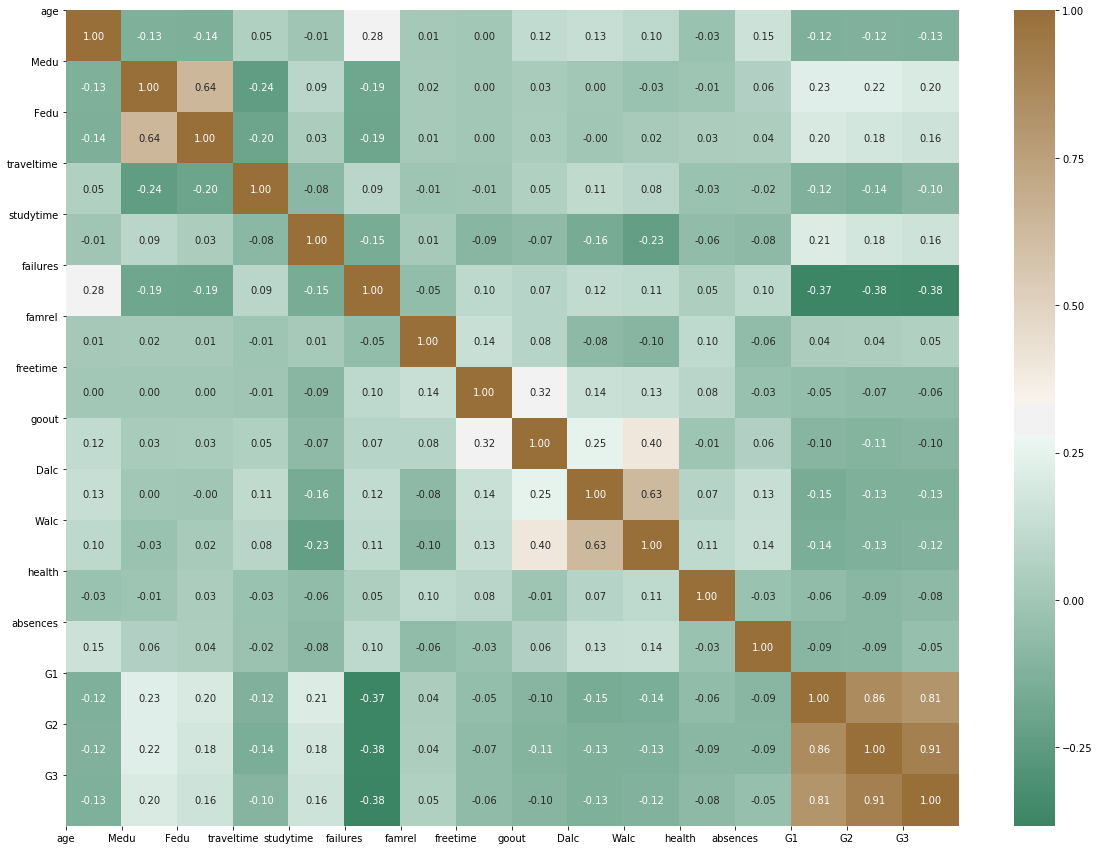

In [236]:
correlation(data)

In [237]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject'],
      dtype='object')

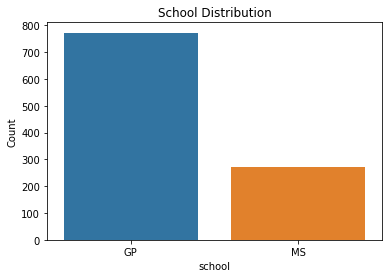

In [238]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'school', data=data, order=['GP','MS'])
ax = ax.set(ylabel="Count", xlabel="school")
figure.grid(False)
plt.title('School Distribution')
plt.savefig('school.png', bbox_inches='tight')

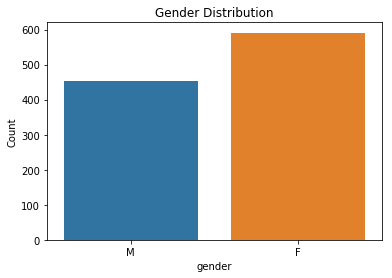

In [239]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'sex', data=data, order=['M','F'])
ax = ax.set(ylabel="Count", xlabel="gender")
figure.grid(False)
plt.title('Gender Distribution')
plt.savefig('gender.png', bbox_inches='tight')

In [240]:
data['age'].max()

22

In [241]:
data['age'].min()

15

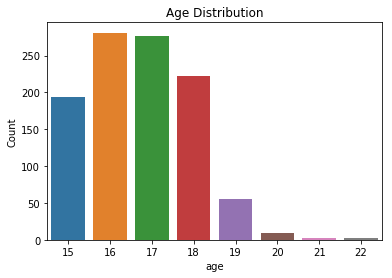

In [242]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'age', data=data, order=[15,16,17,18,19,20,21,22])
ax = ax.set(ylabel="Count", xlabel="age")
figure.grid(False)
plt.title('Age Distribution')
plt.savefig('age_plot.png', bbox_inches='tight')

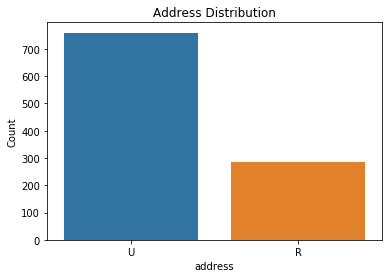

In [243]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'address', data=data, order=['U','R'])
ax = ax.set(ylabel="Count", xlabel="address")
figure.grid(False)
plt.title('Address Distribution')
plt.savefig('address_plot.png', bbox_inches='tight')

In [244]:
data['famsize'].unique()

array(['GT3', 'LE3'], dtype=object)

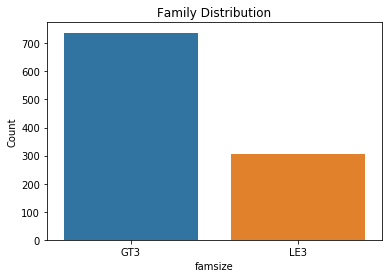

In [245]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'famsize', data=data, order=['GT3','LE3'])
ax = ax.set(ylabel="Count", xlabel="famsize")
figure.grid(False)
plt.title('Family Distribution')
plt.savefig('family_plot.png', bbox_inches='tight')

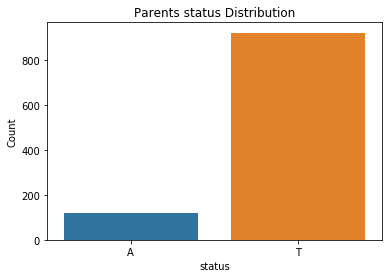

In [246]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Pstatus', data=data, order=['A','T'])
ax = ax.set(ylabel="Count", xlabel="status")
figure.grid(False)
plt.title('Parents status Distribution')
plt.savefig('Pstatus_plot.png', bbox_inches='tight')


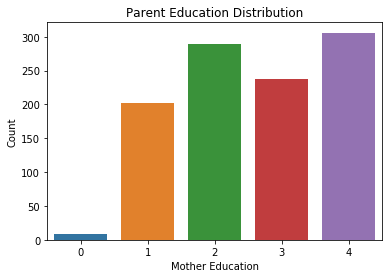

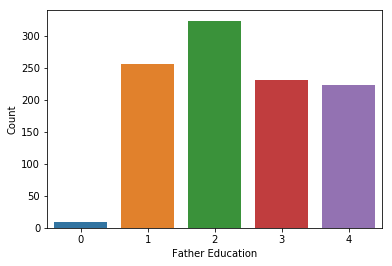

In [247]:
#(numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
f, ax = plt.subplots()
figure = sns.countplot(x = 'Medu', data=data, order=[0,1,2,3,4])
ax = ax.set(ylabel="Count", xlabel="Mother Education")
figure.grid(False)
plt.title('Parent Education Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'Fedu', data=data, order=[0,1,2,3,4])
ax = ax.set(ylabel="Count", xlabel="Father Education")
figure.grid(False)
plt.savefig('Parent_Education_plot.png', bbox_inches='tight')


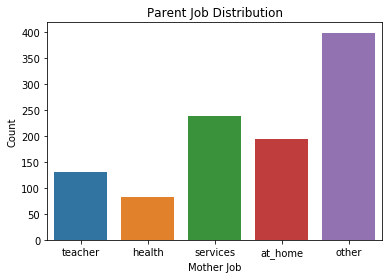

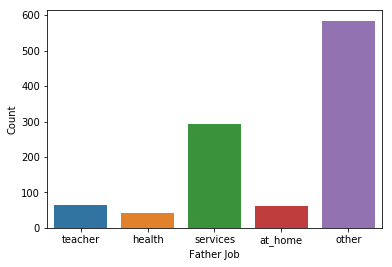

In [248]:
# (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
f, ax = plt.subplots()
figure = sns.countplot(x = 'Mjob', data=data, order=['teacher','health','services','at_home','other'])
ax = ax.set(ylabel="Count", xlabel="Mother Job")
figure.grid(False)
plt.title('Parent Job Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'Fjob', data=data, order=['teacher','health','services','at_home','other'])
ax = ax.set(ylabel="Count", xlabel="Father Job")
figure.grid(False)
plt.savefig('Parent_Job_plot.png', bbox_inches='tight')


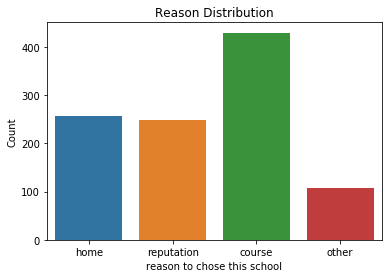

In [249]:
#(nominal: close to 'home', school 'reputation', 'course' preference or 'other')
f, ax = plt.subplots()
figure = sns.countplot(x = 'reason', data=data, order=['home','reputation','course','other'])
ax = ax.set(ylabel="Count", xlabel="reason to chose this school")
figure.grid(False)
plt.title('Reason Distribution')
plt.savefig('Reason_plot.png', bbox_inches='tight')


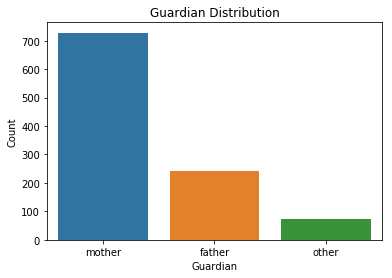

In [250]:
#(nominal: 'mother', 'father' or 'other')
f, ax = plt.subplots()
figure = sns.countplot(x = 'guardian', data=data, order=['mother','father','other'])
ax = ax.set(ylabel="Count", xlabel="Guardian")
figure.grid(False)
plt.title('Guardian Distribution')
plt.savefig('Guardian_plot.png', bbox_inches='tight')


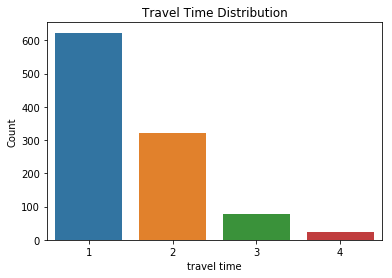

In [251]:
# (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
f, ax = plt.subplots()
figure = sns.countplot(x = 'traveltime', data=data, order=[1,2,3,4])
ax = ax.set(ylabel="Count", xlabel="travel time")
figure.grid(False)
plt.title('Travel Time Distribution')
plt.savefig('travel_time_plot.png', bbox_inches='tight')


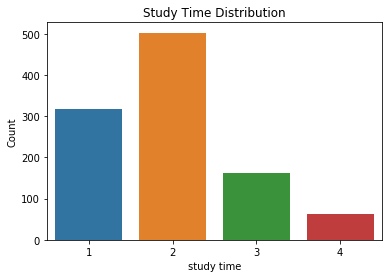

In [252]:
# (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
f, ax = plt.subplots()
figure = sns.countplot(x = 'studytime', data=data, order=[1,2,3,4])
ax = ax.set(ylabel="Count", xlabel="study time")
figure.grid(False)
plt.title('Study Time Distribution')
plt.savefig('Study_time_plot.png', bbox_inches='tight')


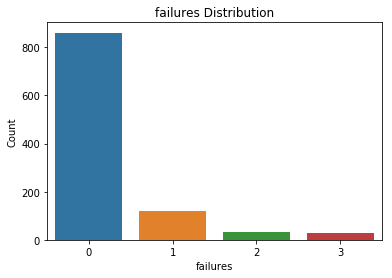

In [253]:
#(numeric: n if 1<=n<3, else 4) 
f, ax = plt.subplots()
figure = sns.countplot(x = 'failures', data=data, order=[0,1,2,3])
ax = ax.set(ylabel="Count", xlabel="failures")
figure.grid(False)
plt.title('failures Distribution')
plt.savefig('failures_plot.png', bbox_inches='tight')


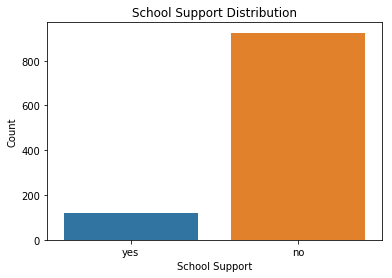

In [254]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'schoolsup', data=data, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="School Support")
figure.grid(False)
plt.title('School Support Distribution')
plt.savefig('school_support_plot.png', bbox_inches='tight')


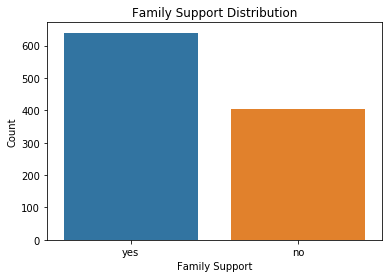

In [255]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'famsup', data=data, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="Family Support")
figure.grid(False)
plt.title('Family Support Distribution')
plt.savefig('Family_support_plot.png', bbox_inches='tight')


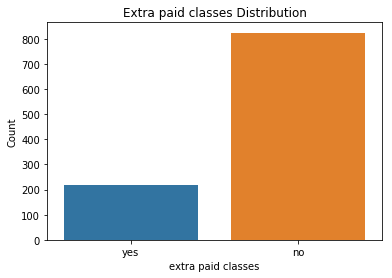

In [256]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'paid', data=data, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="extra paid classes")
figure.grid(False)
plt.title('Extra paid classes Distribution')
plt.savefig('paid_claases_plot.png', bbox_inches='tight')


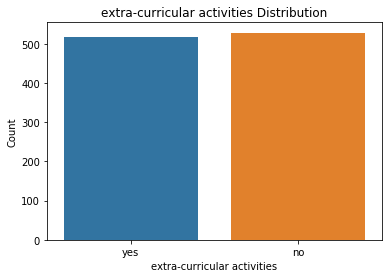

In [257]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'activities', data=data, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="extra-curricular activities")
figure.grid(False)
plt.title('extra-curricular activities Distribution')
plt.savefig('extracurricular_plot.png', bbox_inches='tight')


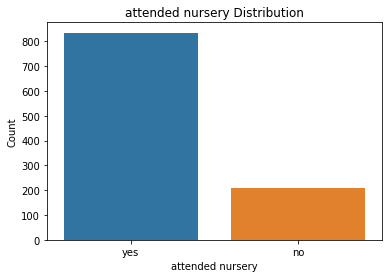

In [258]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'nursery', data=data, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="attended nursery")
figure.grid(False)
plt.title('attended nursery Distribution')
plt.savefig('attend_nursery_plot.png', bbox_inches='tight')


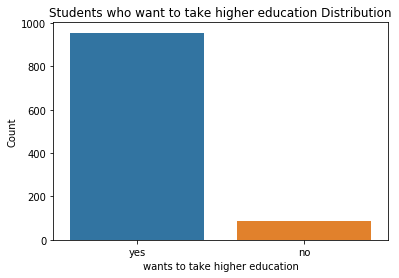

In [259]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'higher', data=data, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="wants to take higher education")
figure.grid(False)
plt.title('Students who want to take higher education Distribution')
plt.savefig('higher_education_plot.png', bbox_inches='tight')


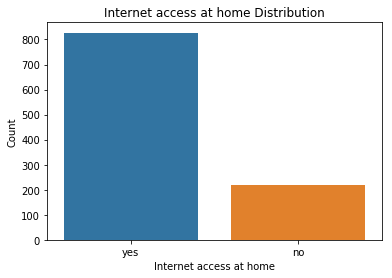

In [260]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'internet', data=data, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="Internet access at home")
figure.grid(False)
plt.title('Internet access at home Distribution')
plt.savefig('school_support_plot.png', bbox_inches='tight')
plt.savefig('internet_plot.png', bbox_inches='tight')


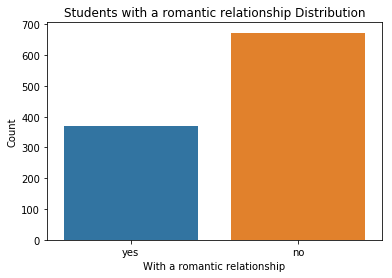

In [261]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'romantic', data=data, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="With a romantic relationship")
figure.grid(False)
plt.title('Students with a romantic relationship Distribution')
plt.savefig('rom_relationship_plot.png', bbox_inches='tight')


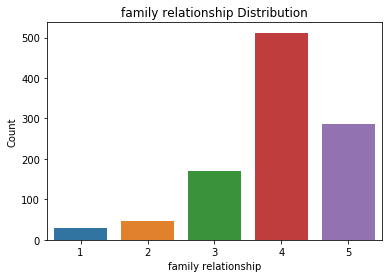

In [262]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'famrel', data=data, order=[1,2,3,4,5])
ax = ax.set(ylabel="Count", xlabel="family relationship")
figure.grid(False)
plt.title('family relationship Distribution')
plt.savefig('fam_relationship_plot.png', bbox_inches='tight')


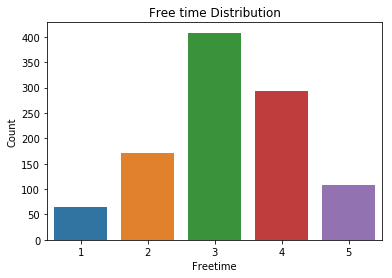

In [263]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'freetime', data=data, order=[1,2,3,4,5])
ax = ax.set(ylabel="Count", xlabel="Freetime")
figure.grid(False)
plt.title('Free time Distribution')
plt.savefig('free_time_plot.png', bbox_inches='tight')


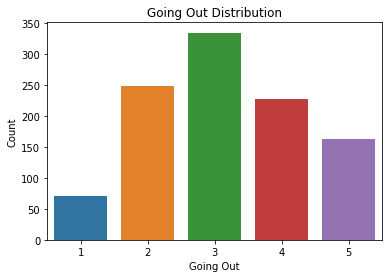

In [264]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'goout', data=data, order=[1,2,3,4,5])
ax = ax.set(ylabel="Count", xlabel="Going Out")
figure.grid(False)
plt.title('Going Out Distribution')
plt.savefig('Going_out_plot.png', bbox_inches='tight')


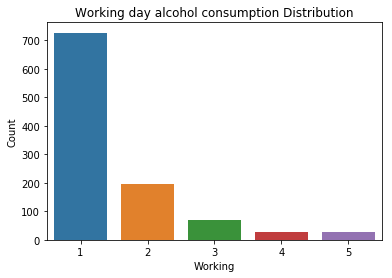

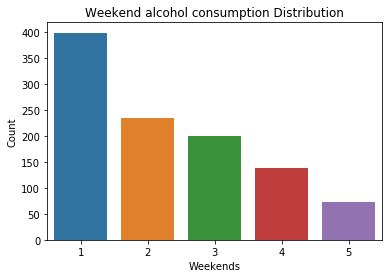

In [265]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Dalc', data=data, order=[1,2,3,4,5])
ax = ax.set(ylabel="Count", xlabel="Working")
figure.grid(False)
plt.title('Working day alcohol consumption Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'Walc', data=data, order=[1,2,3,4,5])
ax = ax.set(ylabel="Count", xlabel="Weekends")
figure.grid(False)
plt.title('Weekend alcohol consumption Distribution')
plt.savefig('alcohol_consumption_plot.png', bbox_inches='tight')


In [266]:
# convert finalscore to categorical variable
data = pd.read_csv('../input/students.csv')
data.head()
data['FinalGrade'] = 'na'
data.loc[(data.G3 >= 18) & (data.G3 <= 20), 'FinalGrade'] = 'Excellent'
data.loc[(data.G3 >= 15) & (data.G3 <= 17), 'FinalGrade'] = 'Good' 
data.loc[(data.G3 >= 11) & (data.G3 <= 14), 'FinalGrade'] = 'Satisfactory' 
data.loc[(data.G3 >= 6) & (data.G3 <= 10), 'FinalGrade'] = 'Poor' 
data.loc[(data.G3 >= 0) & (data.G3 <= 5), 'FinalGrade'] = 'Failure' 
data.head(5)

# data.drop(['Grade'],axis=1)



school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

       ...      goout Dalc  Walc  health  absences  G1  G2  G3     subject  \
0      ...          4    1     1       3         4   0  11  11  Portuguese   
1      ...          3    1     1       3         2   9  11  11  Portuguese   
2      ...          2    2     3       3         6  12  13  12  Portuguese   
3      ...          2    1     1       5         0  14  14  14  Portuguese   
4      ...          2    1     2       5         0  11  13  13  Portuguese   

     FinalGrade  
0  Satisfactory  
1  Satisfactory  
2  Satisfactory  
3  Satisfactory  
4  Satisfactory  

[5 rows x 35 columns]

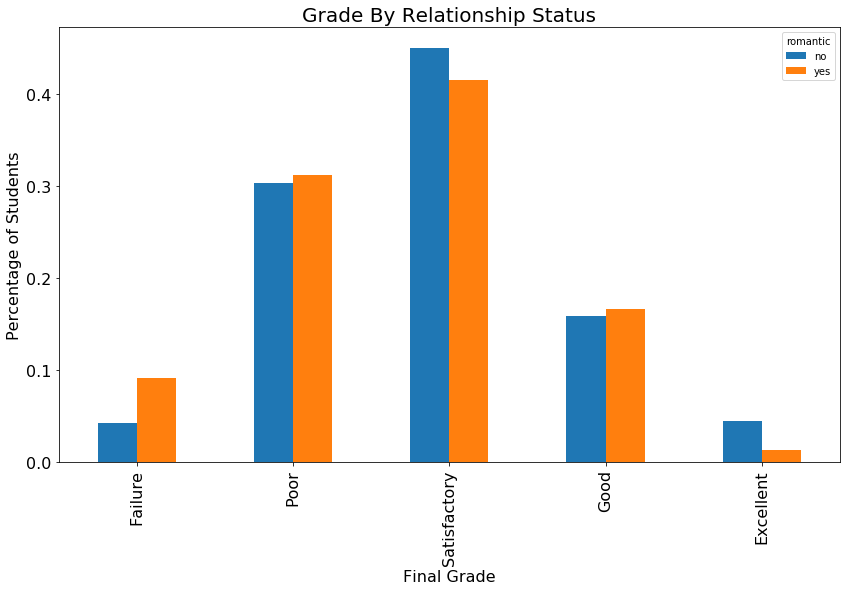

In [267]:
# relationship status
perc = (lambda col: col/col.sum())
index = ['Failure','Poor','Satisfactory','Good','Excellent']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.romantic)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Relationship Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_Relationshipstatus.png', bbox_inches='tight')
plt.show()


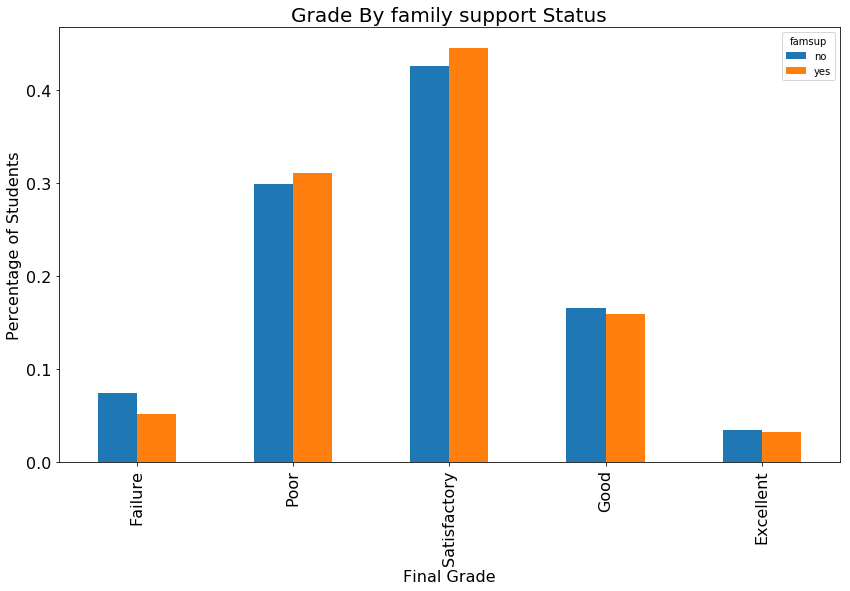

In [268]:
# relationship status
perc = (lambda col: col/col.sum())
index = ['Failure','Poor','Satisfactory','Good','Excellent']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.famsup)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By family support Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_family support.png', bbox_inches='tight')
plt.show()


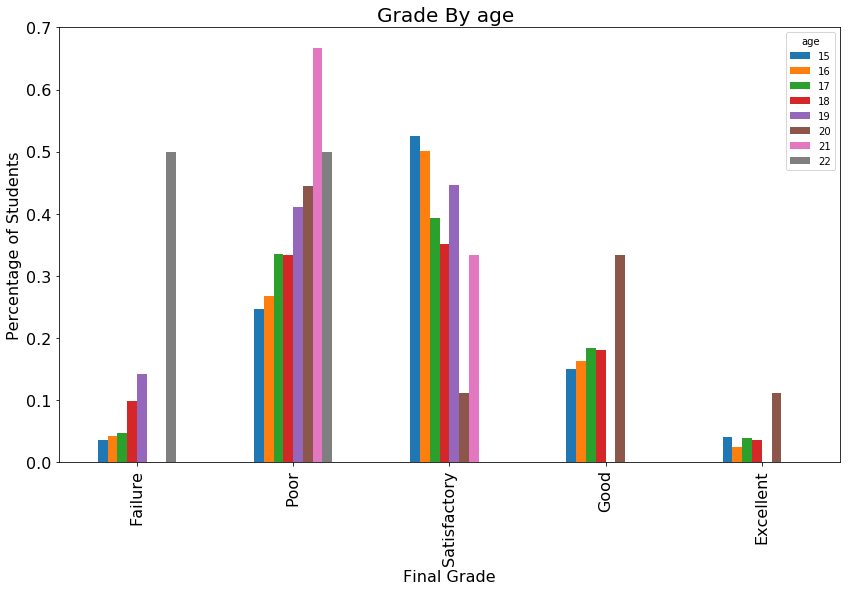

In [269]:
# relationship status
perc = (lambda col: col/col.sum())
index = ['Failure','Poor','Satisfactory','Good','Excellent']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.age)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By age ', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_Age.png', bbox_inches='tight')
plt.show()


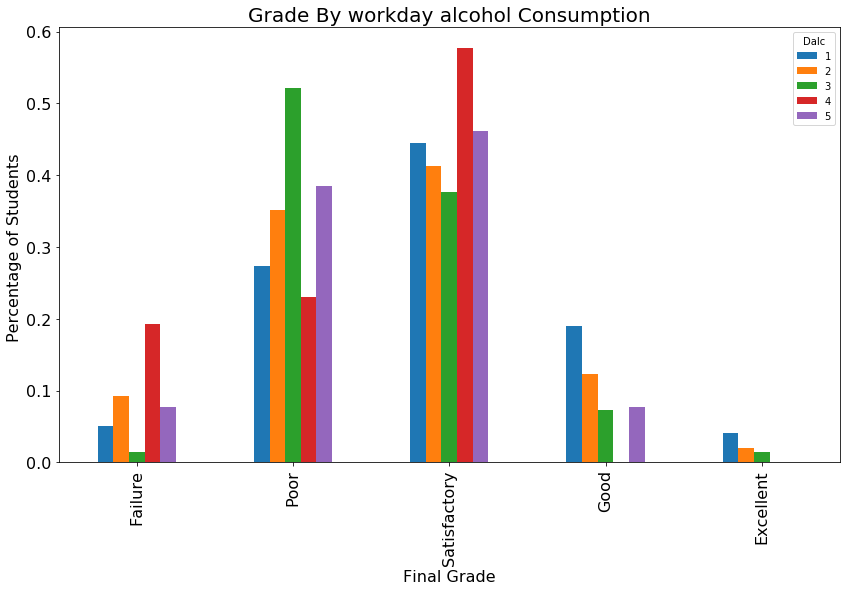

In [270]:
# Dalc - workday alcohol consumption
alcohol_index = pd.crosstab(index=data.FinalGrade, columns=data.Dalc)
workday_alcohol_index = alcohol_index.apply(perc).reindex(index)
workday_alcohol_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By workday alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Students ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_workday_alchol.png', bbox_inches='tight')
plt.show()


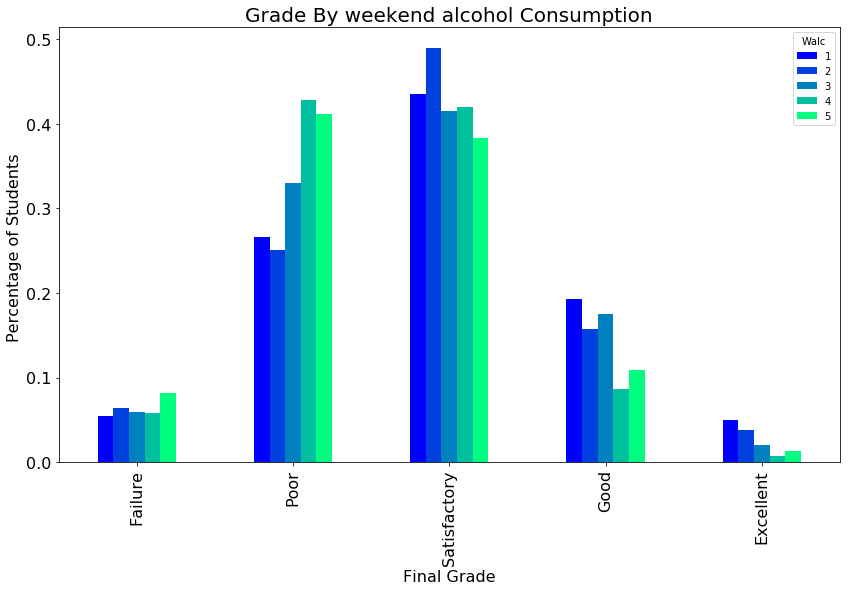

In [271]:
# Walc - weekday alcohol consumption
alcohol_index = pd.crosstab(index=data.FinalGrade, columns=data.Walc)
weekend_alcohol_index = alcohol_index.apply(perc).reindex(index)

weekend_alcohol_index.plot.bar(colormap='winter',fontsize=16, figsize=(14,8))
plt.title('Grade By weekend alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Students ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_weekend_alchol.png', bbox_inches='tight')
plt.show()


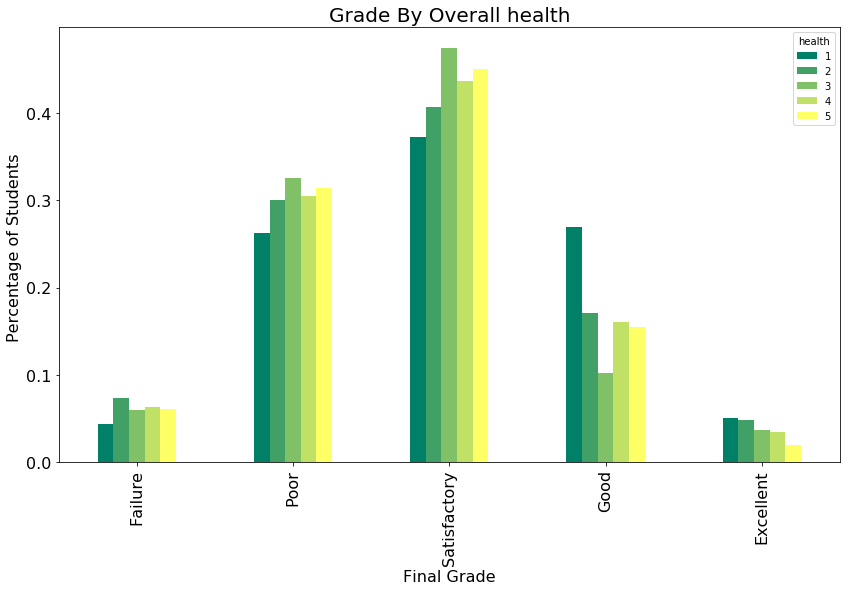

In [272]:
# health - current health status
health_index = pd.crosstab(index=data.FinalGrade, columns=data.health)
Overall_health_index = health_index.apply(perc).reindex(index)

Overall_health_index.plot.bar(colormap='summer',fontsize=16, figsize=(14,8))
plt.title('Grade By Overall health', fontsize=20)
plt.ylabel('Percentage of Students ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_overall_health.png', bbox_inches='tight')
plt.show()


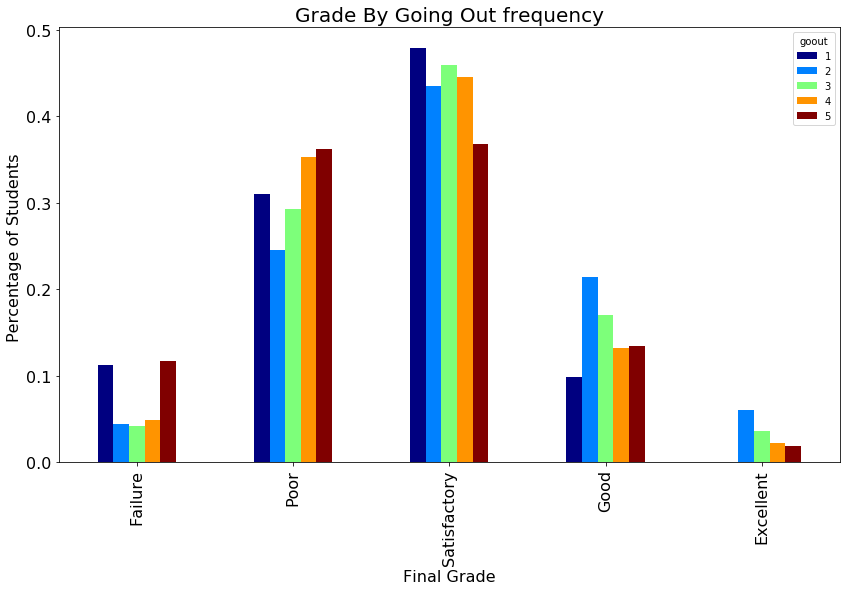

In [273]:
# goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
goout_index = pd.crosstab(index=data.FinalGrade, columns=data.goout)
Overall_goout_index = goout_index.apply(perc).reindex(index)
Overall_goout_index.plot.bar(colormap='jet',fontsize=16, figsize=(14,8))
plt.title('Grade By Going Out frequency', fontsize=20)
plt.ylabel('Percentage of Students ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_going_out.png', bbox_inches='tight')
plt.show()


In [274]:
#absences - number of school absences (numeric: from 0 to 93) 
data.head()
data['Regularity'] = 'na'
data.loc[(data.absences >= 0) & (data.absences <= 9), 'Regularity'] = 'Always Regular'
data.loc[(data.absences >= 10) & (data.absences <= 29), 'Regularity'] = 'Mostly Regular' 
data.loc[(data.absences >= 30) & (data.absences <= 49), 'Regularity'] = 'Regular' 
data.loc[(data.absences >= 50) & (data.absences <= 79), 'Regularity'] = 'Irregular' 
data.loc[(data.absences >= 80)& (data.absences <= 93), 'Regularity'] = 'Highly Irregular'
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

        ...       Dalc Walc  health  absences  G1  G2  G3     subject  \
0       ...          1    1       3         4   0  11  11  Portuguese   
1       ...          1    1       3         2   9  11  11  Portuguese   
2       ...          2    3       3         6  12  13  12  Portuguese   
3       ...          1    1       5         0  14  14  14  Portuguese   
4       ...          1    2       5         0  11  13  13  Portuguese   

     FinalGrade      Regularity  
0  Satisfactory  Always Regular  
1  Satisfactory  Always Regular  
2  Satisfactory  Always Regular  
3  Satisfactory  Always Regular  
4  Satisfactory  Always Regular  

[5 rows x 36 columns]

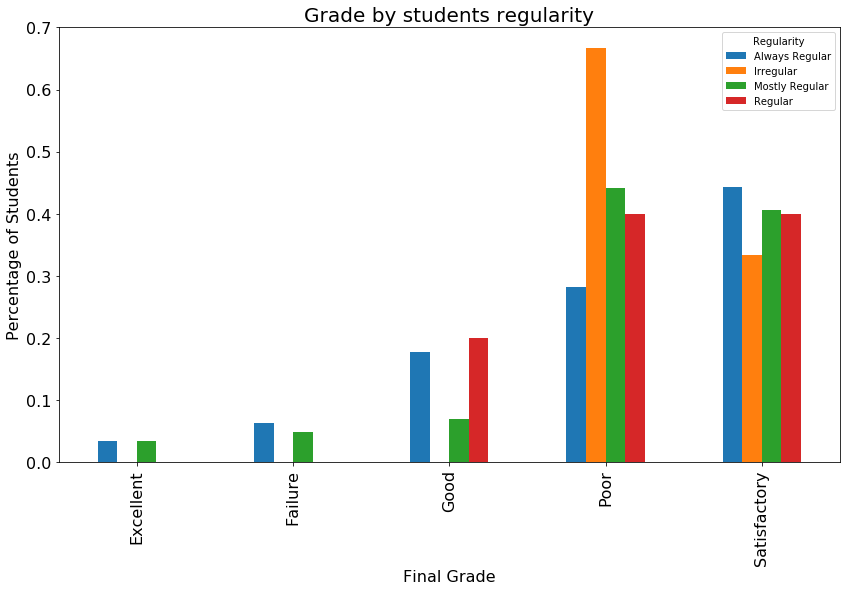

In [275]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
absences = pd.crosstab(index=data.FinalGrade, columns=data.Regularity)
absences = perc(absences)
absences.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by students regularity', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_regularity.png', bbox_inches='tight')
plt.show()




In [276]:
# 31 G1 - first period grade (numeric: from 0 to 20)
# 31 G2 - second period grade (numeric: from 0 to 20)
# 32 G3 - final grade (numeric: from 0 to 20, output target)

In [277]:
data['Grade1'] = 'na'
data.loc[(data.G1 >= 18) & (data.G1 <= 20), 'Grade1'] = 'Excellent'
data.loc[(data.G1 >= 15) & (data.G1 <= 17), 'Grade1'] = 'Good' 
data.loc[(data.G1 >= 11) & (data.G1 <= 14), 'Grade1'] = 'Satisfactory' 
data.loc[(data.G1 >= 6) & (data.G1 <= 10), 'Grade1'] = 'Poor' 
data.loc[(data.G1 >= 0) & (data.G1 <= 5), 'Grade1'] = 'Failure' 

data['Grade2'] = 'na'
data.loc[(data.G2 >= 18) & (data.G2 <= 20), 'Grade2'] = 'Excellent'
data.loc[(data.G2 >= 15) & (data.G2 <= 17), 'Grade2'] = 'Good' 
data.loc[(data.G2 >= 11) & (data.G2 <= 14), 'Grade2'] = 'Satisfactory' 
data.loc[(data.G2 >= 6) & (data.G2 <= 10), 'Grade2'] = 'Poor' 
data.loc[(data.G2 >= 0) & (data.G2 <= 5), 'Grade2'] = 'Failure' 

data.head(5)

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

       ...      health absences  G1  G2  G3     subject    FinalGrade  \
0      ...           3        4   0  11  11  Portuguese  Satisfactory   
1      ...           3        2   9  11  11  Portuguese  Satisfactory   
2      ...           3        6  12  13  12  Portuguese  Satisfactory   
3      ...           5        0  14  14  14  Portuguese  Satisfactory   
4      ...           5        0  11  13  13  Portuguese  Satisfactory   

       Regularity        Grade1        Grade2  
0  Always Regular       Failure  Satisfactory  
1  Always Regular          Poor  Satisfactory  
2  Always Regular  Satisfactory  Satisfactory  
3  Always Regular  Satisfactory  Satisfactory  
4  Always Regular  Satisfactory  Satisfactory  

[5 rows x 38 columns]

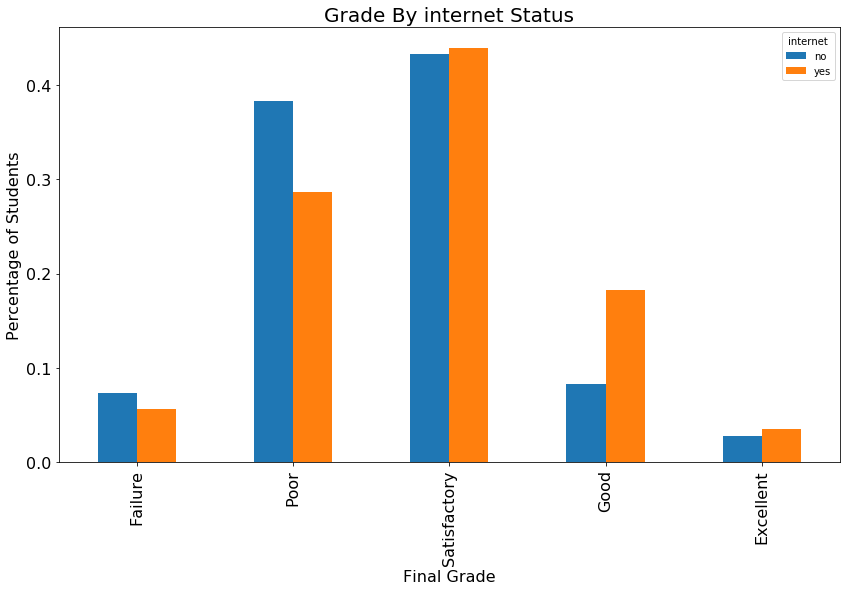

In [278]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
internet_index = pd.crosstab(index=data.FinalGrade, columns=data.internet)
internet_index = internet_index.apply(perc).reindex(index)
internet_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By internet Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_internet_status.png', bbox_inches='tight')

plt.show()


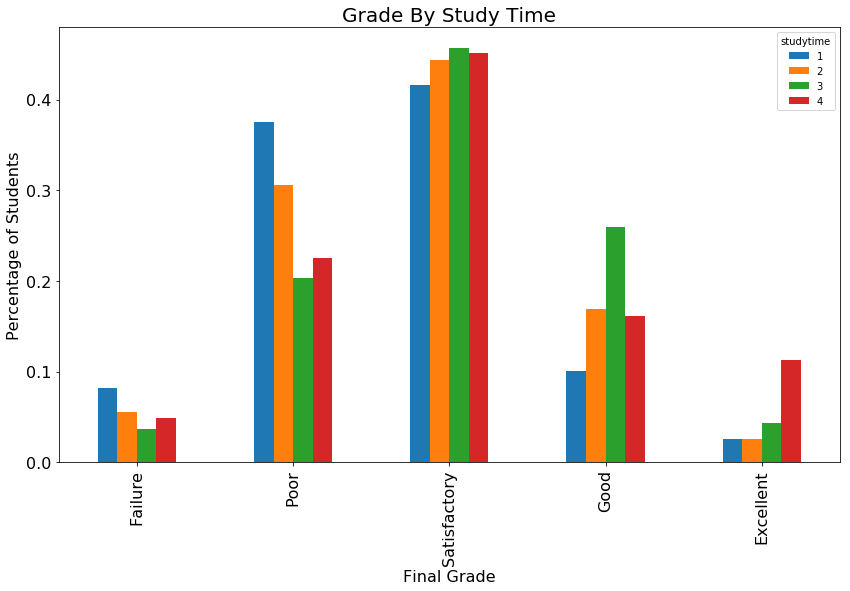

In [279]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
studytime_index = pd.crosstab(index=data.FinalGrade, columns=data.studytime)
studytime_index = studytime_index.apply(perc).reindex(index)
studytime_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Study Time', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_study_time.png', bbox_inches='tight')

plt.show()


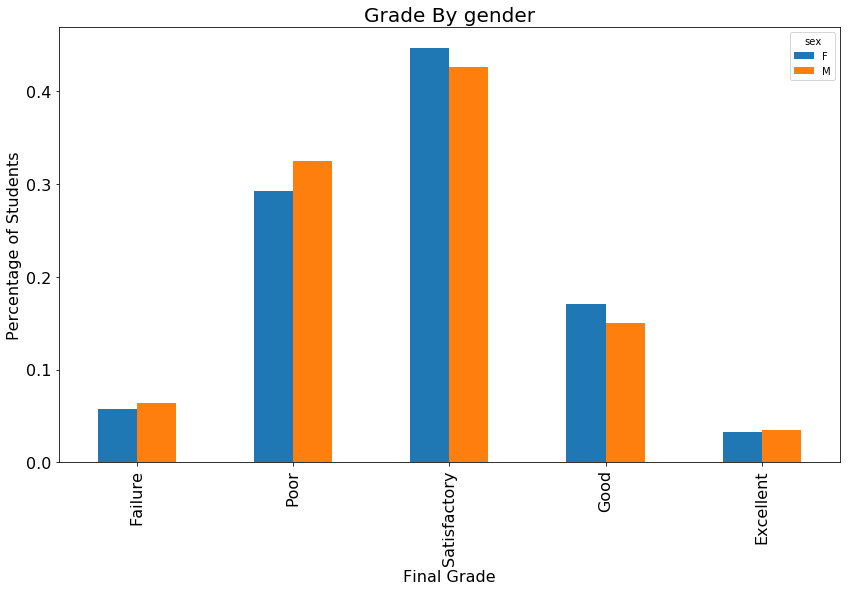

In [280]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
gender_index = pd.crosstab(index=data.FinalGrade, columns=data.sex)
gender_index = gender_index.apply(perc).reindex(index)
gender_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By gender', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_gender.png', bbox_inches='tight')

plt.show()



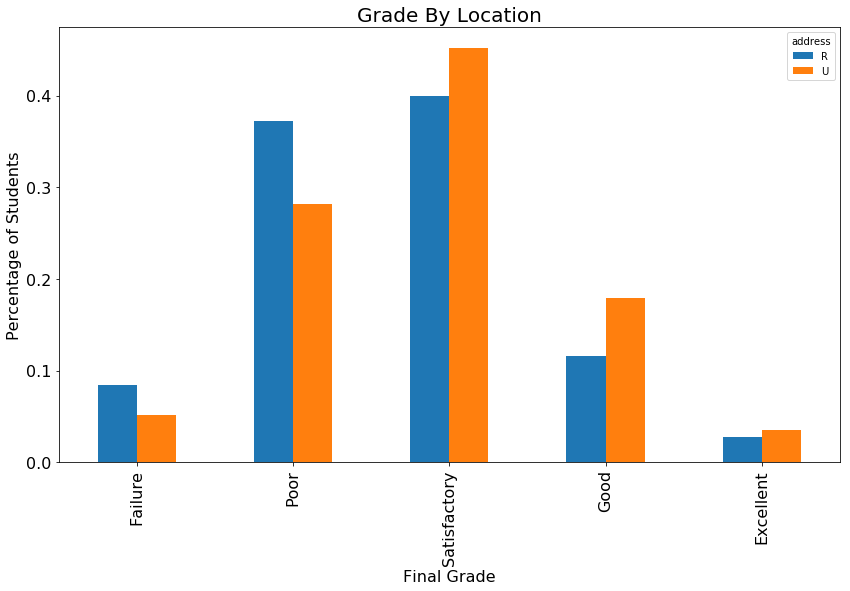

In [281]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
Location_index = pd.crosstab(index=data.FinalGrade, columns=data.address)
Location_index = Location_index.apply(perc).reindex(index)
Location_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Location', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_location.png', bbox_inches='tight')

plt.show()


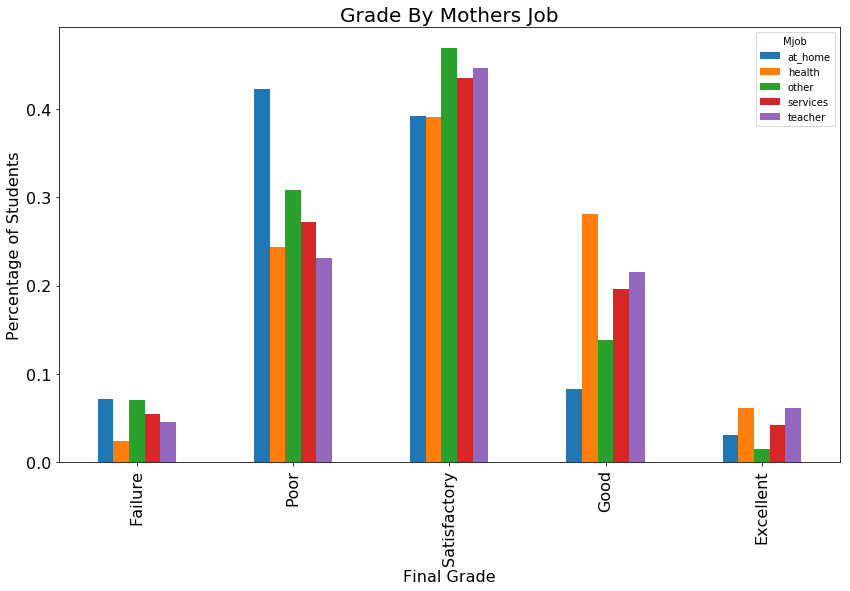

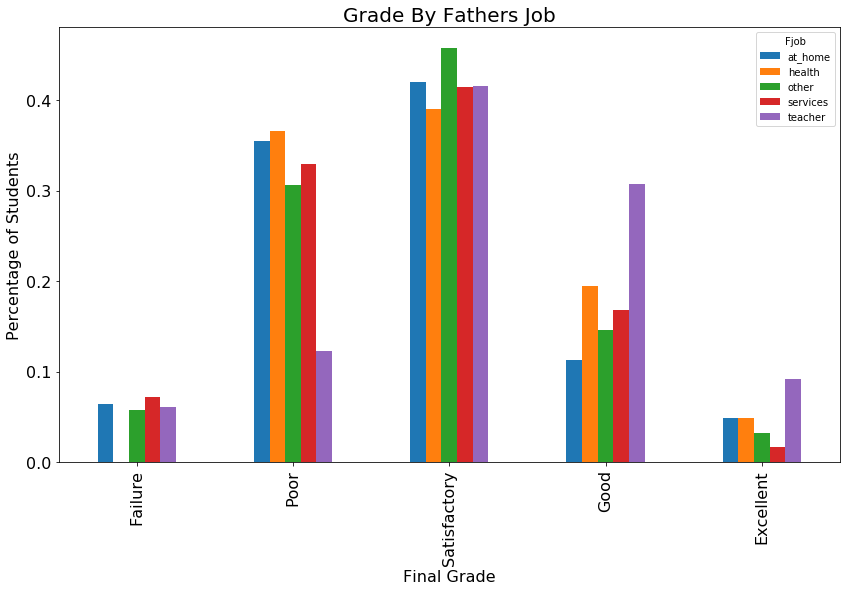

In [282]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
Mothers_index = pd.crosstab(index=data.FinalGrade, columns=data.Mjob)
Mothers_index = Mothers_index.apply(perc).reindex(index)
Mothers_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Mothers Job', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

index = ['Failure','Poor','Satisfactory','Good','Excellent']
Fathers_index = pd.crosstab(index=data.FinalGrade, columns=data.Fjob)
Fathers_index = Fathers_index.apply(perc).reindex(index)
Fathers_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Fathers Job', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_mothers_fathers_job.png', bbox_inches='tight')

plt.show()


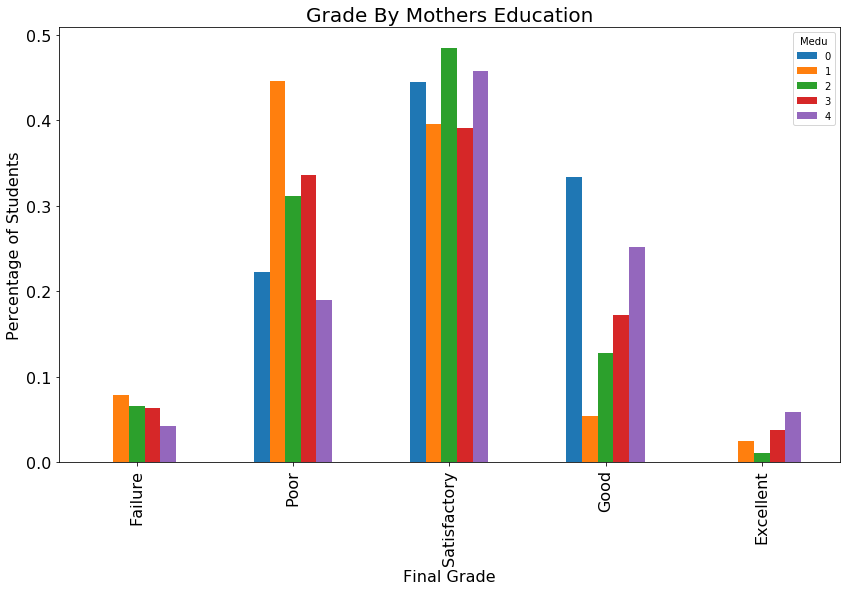

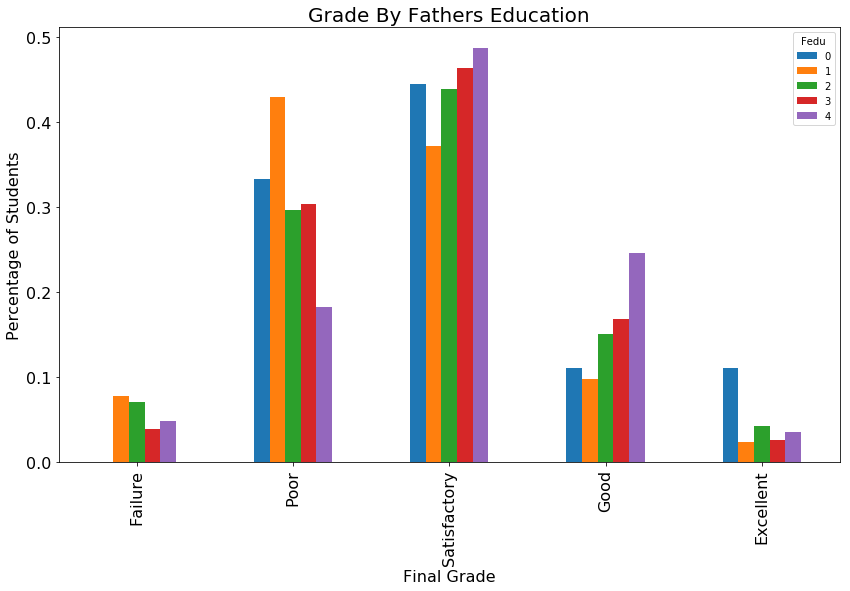

In [283]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
Mothers_index = pd.crosstab(index=data.FinalGrade, columns=data.Medu)
Mothers_index = Mothers_index.apply(perc).reindex(index)
Mothers_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Mothers Education', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

index = ['Failure','Poor','Satisfactory','Good','Excellent']
Fathers_index = pd.crosstab(index=data.FinalGrade, columns=data.Fedu)
Fathers_index = Fathers_index.apply(perc).reindex(index)
Fathers_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Fathers Education', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_mothers_fathers_edu.png', bbox_inches='tight')

plt.show()


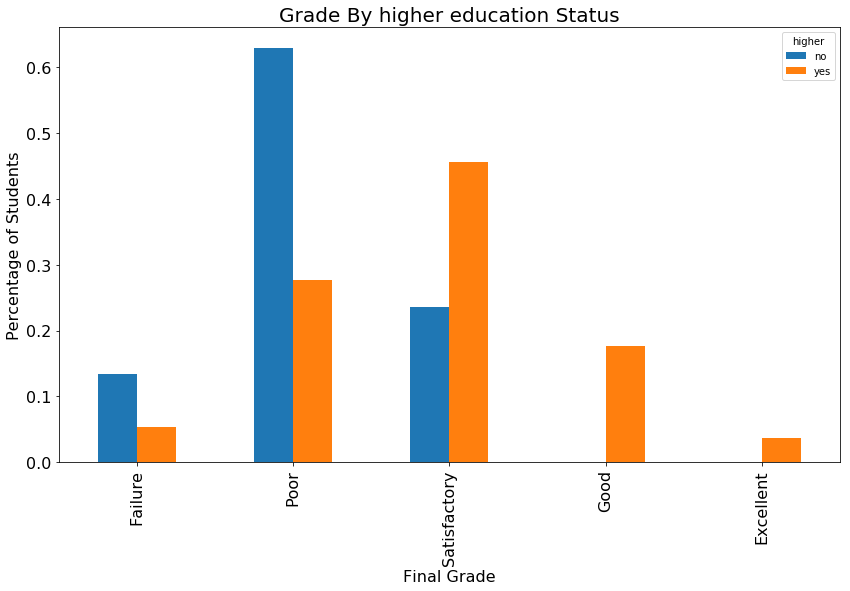

In [284]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
higher_index = pd.crosstab(index=data.FinalGrade, columns=data.higher)
higher_index = higher_index.apply(perc).reindex(index)
higher_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By higher education Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_mhigher_education_status.png', bbox_inches='tight')

plt.show()


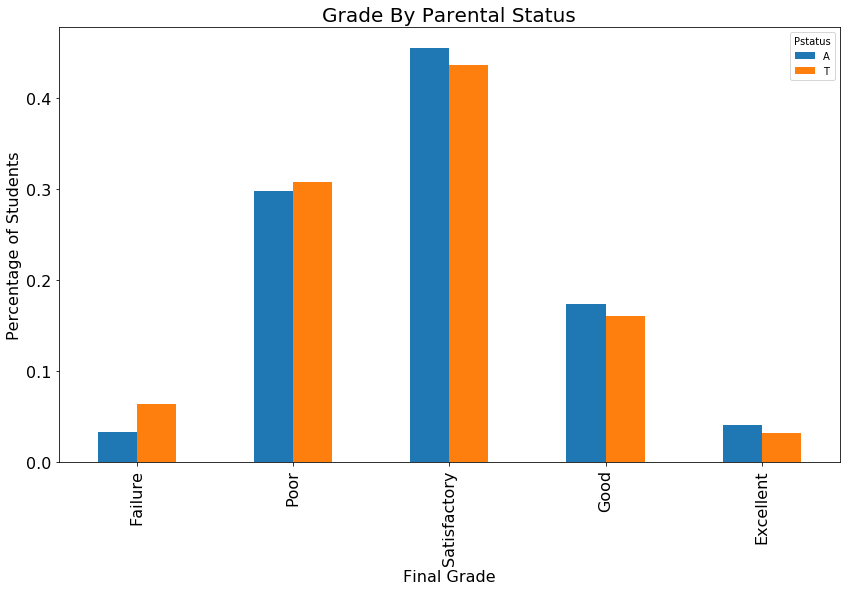

In [285]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
status_index = pd.crosstab(index=data.FinalGrade, columns=data.Pstatus)
status_index = status_index.apply(perc).reindex(index)
status_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Parental Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_Parental_status.png', bbox_inches='tight')

plt.show()


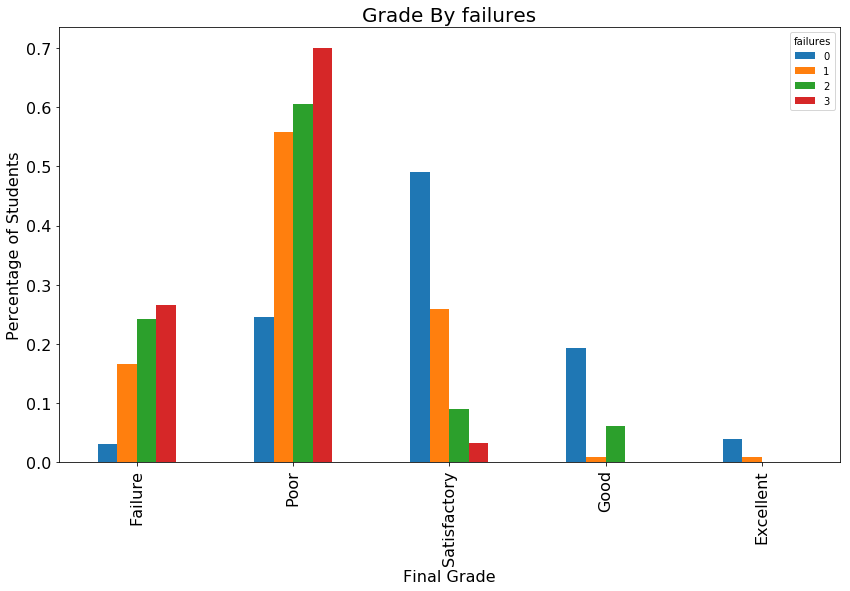

In [286]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
status_index = pd.crosstab(index=data.FinalGrade, columns=data.failures)
status_index = status_index.apply(perc).reindex(index)
status_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By failures', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_Failure_status.png', bbox_inches='tight')

plt.show()

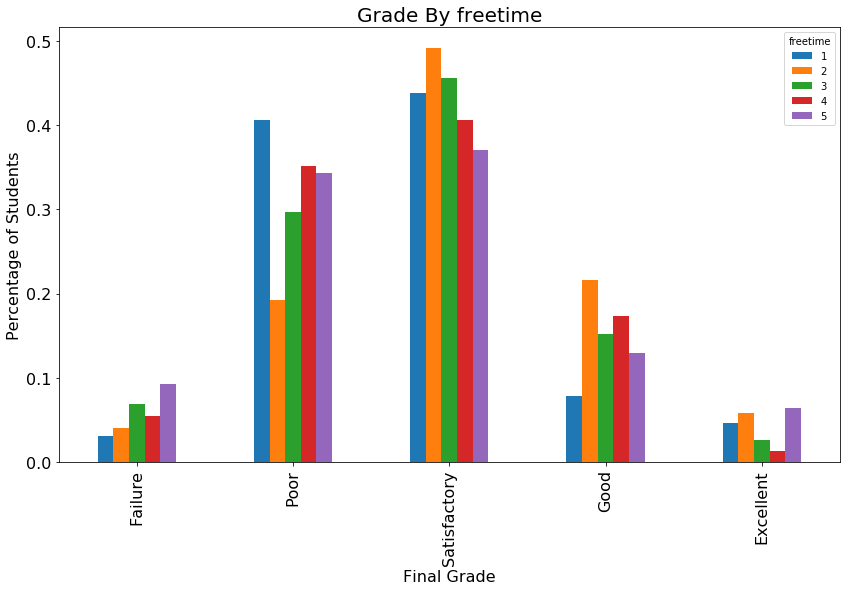

In [287]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
status_index = pd.crosstab(index=data.FinalGrade, columns=data.freetime)
status_index = status_index.apply(perc).reindex(index)
status_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By freetime', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_freetime_status.png', bbox_inches='tight')

plt.show()

In [288]:
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

       ...      health absences  G1  G2  G3     subject    FinalGrade  \
0      ...           3        4   0  11  11  Portuguese  Satisfactory   
1      ...           3        2   9  11  11  Portuguese  Satisfactory   
2      ...           3        6  12  13  12  Portuguese  Satisfactory   
3      ...           5        0  14  14  14  Portuguese  Satisfactory   
4      ...           5        0  11  13  13  Portuguese  Satisfactory   

       Regularity        Grade1        Grade2  
0  Always Regular       Failure  Satisfactory  
1  Always Regular          Poor  Satisfactory  
2  Always Regular  Satisfactory  Satisfactory  
3  Always Regular  Satisfactory  Satisfactory  
4  Always Regular  Satisfactory  Satisfactory  

[5 rows x 38 columns]

In [289]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject', 'FinalGrade',
       'Regularity', 'Grade1', 'Grade2'],
      dtype='object')

In [290]:
data.shape

(1044, 38)

In [1]:
data.to_csv('../input/features.csv', index=False)

NameError: name 'data' is not defined